In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.linalg import block_diag

In [ ]:
# friction map:  [[0.09041 0.1     0.09041]
#                 [0.1     0.09041 0.09041]
#                 [0.1     0.1568  0.1    ]]

In [246]:
plt.close("all")

In [247]:
data = "../data/robot_data.csv"


In [248]:
df = pd.read_csv(data, index_col=0)

In [311]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
ax[0].hist(df.wheel_l)
ax[0].set_title('wheel_l')
ax[1].hist(df.wheel_r)
ax[1].set_title('wheel_r')
plt.show()

In [249]:
df

,wheel_l,wheel_r,beta_l,beta_r,alpha,i,j
0,4.155274,4.784391,-0.014900,-0.009315,-0.054196,2,0
1,5.977355,6.891848,-0.021628,0.016839,0.011449,2,0
2,8.223175,9.504792,-0.057873,-0.042738,-0.002856,2,0
3,10.903814,12.755739,-0.028137,0.013516,-0.007740,2,0
4,10.861779,13.326798,-0.015634,0.011683,-0.035604,2,0
...,...,...,...,...,...,...,...
1265,10.616563,14.572747,-0.033829,0.022238,-0.069511,1,2
1266,10.070487,13.001976,-0.020616,0.009150,-0.064357,1,2
1267,7.671566,12.559155,-0.139443,0.000703,-0.071222,2,2
1268,9.276870,12.012678,-0.030979,-0.009634,-0.031682,2,2


In [273]:
i_filter = 0
j_filter = 1

In [274]:
filtered = df[(df.i == i_filter) & (df.j == j_filter)]
filtered

,wheel_l,wheel_r,beta_l,beta_r,alpha,i,j
15,11.089517,10.788732,-0.014075,-0.014291,-0.020845,0,1
16,8.005741,8.687434,-0.026832,-0.022176,-0.029403,0,1
17,5.342473,7.230651,-0.037286,-0.013343,-0.020245,0,1
18,3.417532,6.689693,-0.037912,0.000275,0.000000,0,1
19,2.883514,6.628950,0.015672,0.055064,-0.125624,0,1
...,...,...,...,...,...,...,...
1253,4.765679,6.542727,0.010982,0.040713,-0.070040,0,1
1254,5.518318,7.725910,0.010126,0.037240,-0.050460,0,1
1255,6.570399,8.847197,-0.014788,0.007788,-0.017697,0,1
1256,7.872897,10.069863,0.017827,0.048725,-0.029380,0,1


In [275]:
# filtered = filtered[(filtered.wheel_l > 9) & (filtered.wheel_r > 11)]
# filtered.sort_values(["wheel_l","wheel_r"])

In [276]:
omega_l = filtered.wheel_l.values
omega_r = filtered.wheel_r.values
beta_l = filtered.beta_l.values
beta_r = filtered.beta_r.values
alpha = filtered.alpha.values

In [277]:
%matplotlib tk

In [278]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle("Residuals")

# Beta_l residuals
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(omega_l, omega_r, beta_l, color="green")
ax1.set_xlabel("omega_l")
ax1.set_ylabel("omega_r")
ax1.set_title("beta_l")
# ax1.view_init(0, 0, 0)

# Beta_r residuals
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(omega_l, omega_r, beta_r, color="orange")
ax2.set_xlabel("omega_l")
ax2.set_ylabel("omega_r")
ax2.set_title("beta_r")
# ax2.view_init(0, 0, 0)

# Alpha residuals
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(omega_l, omega_r, alpha, color="purple")
ax3.set_xlabel("omega_l")
ax3.set_ylabel("omega_r")
ax3.set_title("alpha")
# ax3.view_init(0, 0, 0)

plt.show()

In [279]:
X = np.column_stack((np.ones(len(omega_l)), omega_l, omega_r))
Y = np.column_stack((beta_l, beta_r, alpha))

In [280]:
# OLS regressor

theta_hat_ols = np.linalg.inv(X.T @ X) @ (X.T @ Y)
y_hat_ols = X @ theta_hat_ols

theta_hat_ols

array([[-0.02863276, -0.07966119,  0.00644294],
       [-0.001924  , -0.02441223,  0.01557667],
       [ 0.00333874,  0.02926153, -0.0152573 ]])

In [281]:
residuals_ols = Y - y_hat_ols

In [282]:
%matplotlib inline

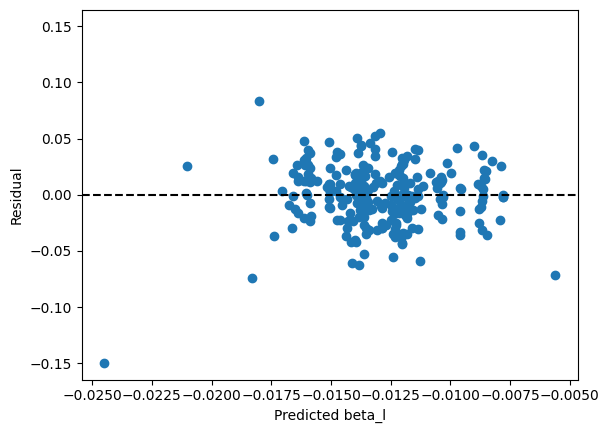

In [283]:
bound = max(abs(residuals_ols[...,0].min()),abs(residuals_ols[...,0].max()))
plt.ylim(-bound*1.1, bound*1.1)
plt.scatter(y_hat_ols[...,0], residuals_ols[...,0])
plt.axhline(0,linestyle='--', color='black')
plt.xlabel("Predicted beta_l")
plt.ylabel("Residual")
plt.show()

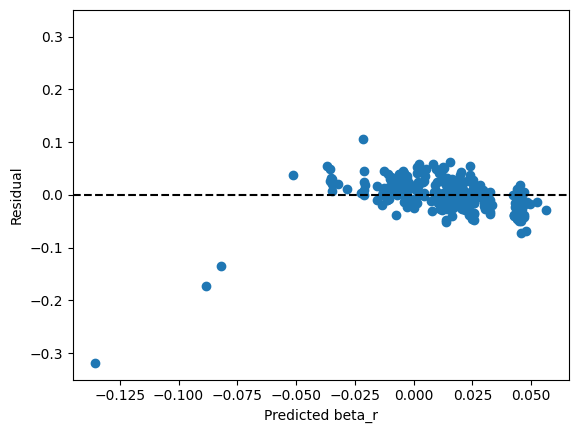

In [284]:
bound = max(abs(residuals_ols[...,1].min()),abs(residuals_ols[...,1].max()))
plt.ylim(-bound*1.1, bound*1.1)
plt.scatter(y_hat_ols[...,1], residuals_ols[...,1])
plt.axhline(0,linestyle='--', color='black')
plt.xlabel("Predicted beta_r")
plt.ylabel("Residual")
plt.show()

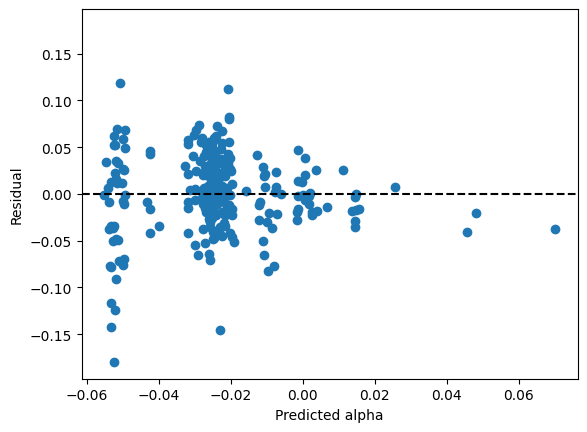

In [285]:
bound = max(abs(residuals_ols[...,2].min()),abs(residuals_ols[...,2].max()))
plt.ylim(-bound*1.1, bound*1.1)
plt.scatter(y_hat_ols[...,2], residuals_ols[...,2])
plt.axhline(0,linestyle='--', color='black')
plt.xlabel("Predicted alpha")
plt.ylabel("Residual")
plt.show()

In [286]:
# WLS regressor

weights_l = 1 / (residuals_ols[:, 0] ** 2 + 1e-20) 
weights_r = 1 / (residuals_ols[:, 1] ** 2 + 1e-20) 
weights_alpha = 1 / (residuals_ols[:, 2] ** 2 + 1e-20)

W_l = np.diag(weights_l)
W_r = np.diag(weights_r)
W_alpha = np.diag(weights_alpha)

W = block_diag(W_l, W_r, W_alpha)

X_expanded = np.kron(np.eye(3), X)

XTWX_inv = np.linalg.inv(X_expanded.T @ W @ X_expanded)
XTWy = X_expanded.T @ W @ Y.flatten(order='F')
theta_hat_wls_flat = XTWX_inv @ XTWy

theta_hat_wls = theta_hat_wls_flat.reshape(3, -1).T
y_hat_wls = X @ theta_hat_wls

theta_hat_wls

array([[-0.0289131 , -0.07933825,  0.00656644],
       [-0.00200048, -0.02429535,  0.01563497],
       [ 0.0034271 ,  0.02913874, -0.01532799]])

In [287]:
residuals_wls = Y - y_hat_wls

In [288]:
std_residuals_beta_l = residuals_wls[:, 0] * np.sqrt(weights_l)
std_residuals_beta_r = residuals_wls[:, 1] * np.sqrt(weights_r)
std_residuals_alpha = residuals_wls[:, 2] * np.sqrt(weights_alpha)

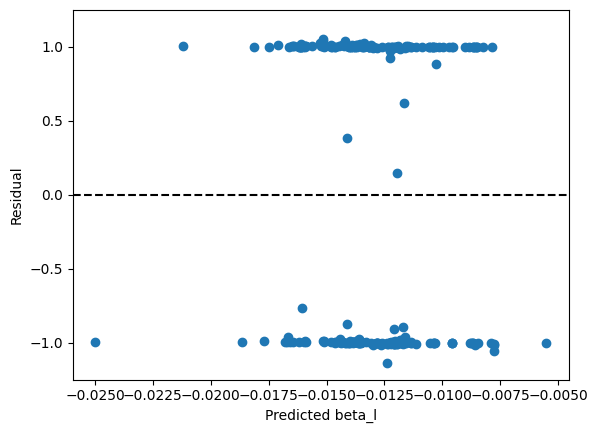

In [289]:
bound = max(abs(std_residuals_beta_l.min()),abs(std_residuals_beta_l.max()))
plt.ylim(-bound*1.1, bound*1.1)
plt.scatter(y_hat_wls[...,0], std_residuals_beta_l)
plt.axhline(0,linestyle='--', color='black')
plt.xlabel("Predicted beta_l")
plt.ylabel("Residual")
plt.show()

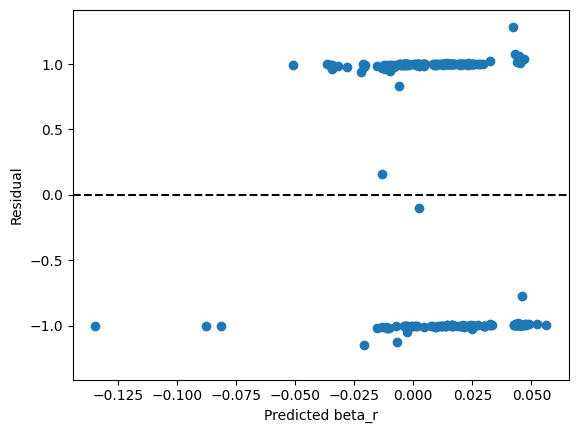

In [290]:
bound = max(abs(std_residuals_beta_r.min()),abs(std_residuals_beta_r.max()))
plt.ylim(-bound*1.1, bound*1.1)
plt.scatter(y_hat_wls[...,1], std_residuals_beta_r)
plt.axhline(0,linestyle='--', color='black')
plt.xlabel("Predicted beta_r")
plt.ylabel("Residual")
plt.show()

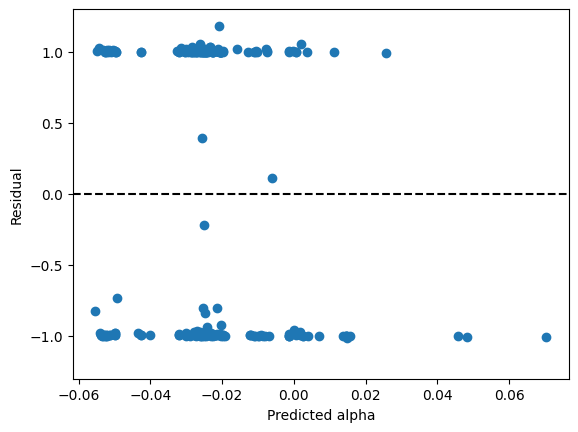

In [291]:
bound = max(abs(std_residuals_alpha.min()),abs(std_residuals_alpha.max()))
plt.ylim(-bound*1.1, bound*1.1)
plt.scatter(y_hat_wls[...,2], std_residuals_alpha)
plt.axhline(0,linestyle='--', color='black')
plt.xlabel("Predicted alpha")
plt.ylabel("Residual")
plt.show()

In [292]:
%matplotlib tk

In [293]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle("Data")

# Beta_l residuals
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(omega_l, omega_r, beta_l, color="green")
ax1.scatter(omega_l, omega_r, y_hat_ols[...,0], color="blue")
ax1.scatter(omega_l, omega_r, y_hat_wls[...,0], color="red")
ax1.set_xlabel("omega_l")
ax1.set_ylabel("omega_r")
ax1.set_title("beta_l")
# ax1.view_init(0, 0, 0)

# Beta_r residuals
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(omega_l, omega_r, beta_r, color="orange")
ax2.scatter(omega_l, omega_r, y_hat_ols[...,1], color="blue")
ax2.scatter(omega_l, omega_r, y_hat_wls[...,1], color="red")
ax2.set_xlabel("omega_l")
ax2.set_ylabel("omega_r")
ax2.set_title("beta_r")
# ax2.view_init(0, 0, 0)

# Alpha residuals
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(omega_l, omega_r, alpha, color="purple")
ax3.scatter(omega_l, omega_r, y_hat_ols[...,2], color="blue")
ax3.scatter(omega_l, omega_r, y_hat_wls[...,2], color="red")
ax3.set_xlabel("omega_l")
ax3.set_ylabel("omega_r")
ax3.set_title("alpha")
# ax3.view_init(0, 0, 0)

plt.show()

In [294]:
# Extract coefficients from WLS estimation
theta_0_l, theta_1_l, theta_2_l = theta_hat_wls[:, 0]  # Coefficients for beta_l
theta_0_r, theta_1_r, theta_2_r = theta_hat_wls[:, 1]  # Coefficients for beta_r
theta_0_alpha, theta_1_alpha, theta_2_alpha = theta_hat_wls[:, 2]  # Coefficients for alpha

# Create a grid of values for omega_l and omega_r
omega_l_grid, omega_r_grid = np.meshgrid(np.linspace(omega_l.min(), omega_l.max(), 100),
                                         np.linspace(omega_r.min(), omega_r.max(), 100))

# Calculate the corresponding beta_l, beta_r, and alpha values on the grid
beta_l_grid = theta_0_l + theta_1_l * omega_l_grid + theta_2_l * omega_r_grid
beta_r_grid = theta_0_r + theta_1_r * omega_l_grid + theta_2_r * omega_r_grid
alpha_grid = theta_0_alpha + theta_1_alpha * omega_l_grid + theta_2_alpha * omega_r_grid

In [295]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle("Residuals")



# Beta_l residuals
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(omega_l, omega_r, beta_l, color="green")
ax1.scatter(omega_l, omega_r, y_hat_ols[...,0], color="blue")
ax1.scatter(omega_l, omega_r, y_hat_wls[...,0], color="red")
ax1.plot_surface(omega_l_grid, omega_r_grid, beta_l_grid, alpha=1)
ax1.set_xlabel("omega_l")
ax1.set_ylabel("omega_r")
ax1.set_title("beta_l")
# ax1.view_init(0, 0, 0)

# Beta_r residuals
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(omega_l, omega_r, beta_r, color="orange")
ax2.scatter(omega_l, omega_r, y_hat_ols[...,1], color="blue")
ax2.scatter(omega_l, omega_r, y_hat_wls[...,1], color="red")
ax2.plot_surface(omega_l_grid, omega_r_grid, beta_r_grid, alpha=1)
ax2.set_xlabel("omega_l")
ax2.set_ylabel("omega_r")
ax2.set_title("beta_r")
# ax2.view_init(0, 0, 0)

# Alpha residuals
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(omega_l, omega_r, alpha, color="purple")
ax3.scatter(omega_l, omega_r, y_hat_ols[...,2], color="blue")
ax3.scatter(omega_l, omega_r, y_hat_wls[...,2], color="red")
ax3.plot_surface(omega_l_grid, omega_r_grid, alpha_grid, alpha=1)
ax3.set_xlabel("omega_l")
ax3.set_ylabel("omega_r")
ax3.set_title("alpha")
# ax3.view_init(0, 0, 0)

plt.show()

In [296]:
print(f"beta_l r2: ols={r2_score(Y[...,0], y_hat_ols[...,0])}, wls={r2_score(Y[...,0], y_hat_wls[...,0])}")
print(f"beta_r r2: ols={r2_score(Y[...,1], y_hat_ols[...,1])}, wls={r2_score(Y[...,1], y_hat_wls[...,1])}")
print(f"alpha r2: ols={r2_score(Y[...,2], y_hat_ols[...,2])}, wls={r2_score(Y[...,2], y_hat_wls[...,2])}")

beta_l r2: ols=0.008328253841825006, wls=0.00831907368685314
beta_r r2: ols=0.3082982229604865, wls=0.30828928881110174
alpha r2: ols=0.1627095974205227, wls=0.16270289439806485


In [305]:
df_1 = pd.read_csv("data/1.csv", index_col=0) 

In [309]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle("Residuals")

omega_l_gt = df_1.wheel_l.values
omega_r_gt = df_1.wheel_r.values
beta_l_gt = df_1.beta_l.values
beta_r_gt = df_1.beta_r.values
alpha_gt = df_1.alpha.values

# Beta_l residuals
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(omega_l_gt, omega_r_gt, beta_l_gt, color="green")
ax1.plot_surface(omega_l_grid, omega_r_grid, beta_l_grid, alpha=1)
ax1.set_xlabel("omega_l")
ax1.set_ylabel("omega_r")
ax1.set_title("beta_l")
# ax1.view_init(0, 0, 0)

# Beta_r residuals
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(omega_l_gt, omega_r_gt, beta_r_gt, color="orange")
ax2.plot_surface(omega_l_grid, omega_r_grid, beta_r_grid, alpha=1)
ax2.set_xlabel("omega_l")
ax2.set_ylabel("omega_r")
ax2.set_title("beta_r")
# ax2.view_init(0, 0, 0)

# Alpha residuals
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(omega_l_gt, omega_r_gt, alpha_gt, color="purple")
ax3.plot_surface(omega_l_grid, omega_r_grid, alpha_grid, alpha=1)
ax3.set_xlabel("omega_l")
ax3.set_ylabel("omega_r")
ax3.set_title("alpha")
# ax3.view_init(0, 0, 0)

plt.show()